In [1]:
from astropy import units as u

from poliastro.bodies import Earth, Mars, Sun
from poliastro.twobody import Orbit
import matplotlib.pyplot as plt

In [2]:
r = [-6045, -3490, 2500] * u.km
v = [-3.459, 6.618, 2.533] * u.km / u.s
orb = Orbit.from_vectors(Earth, r, v)

In [3]:
orb

7283 x 10299 km x 153.3 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT)

In [4]:
orb.epoch

<Time object: scale='tt' format='jyear_str' value=J2000.000>

In [5]:
orb.epoch.iso

'2000-01-01 12:00:00.000'

In [6]:
?Orbit.from_vectors

In [12]:
orb_30 = orb.propagate(30*u.min)
orb_30.rv()

(<Quantity [-3662.87194804,  8033.86149561,  2813.56742421] km>,
 <Quantity [ 4.67942173,  3.95424523, -1.77494153] km / s>)

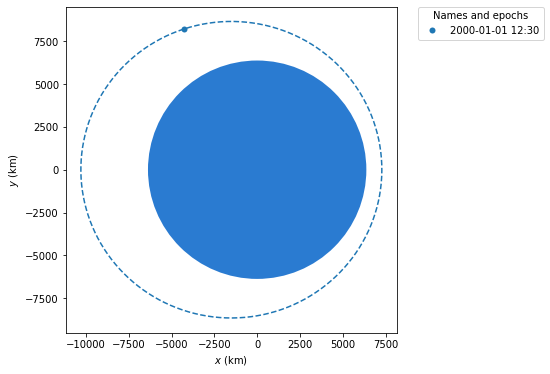

In [14]:
orb_30.plot()

In [8]:
from poliastro.examples import iss
iss

6772 x 6790 km x 51.6 deg (GCRS) orbit around Earth (♁) at epoch 2013-03-18 12:00:00.000 (UTC)

In [9]:
iss.epoch.iso

'2013-03-18 12:00:00.000'

In [10]:
iss_30m = iss.propagate(30*u.min)
iss_30m.epoch.iso

'2013-03-18 12:30:00.000'

In [15]:
from astropy.coordinates import SkyCoord

In [79]:
cart = SkyCoord(x = 100000000, y = 100000000, z = 100000000, unit='km' ,frame = '' , representation_type = 'cartesian')

ValueError: Coordinate frame name "" is not a known coordinate frame (['altaz', 'barycentricmeanecliptic', 'barycentrictrueecliptic', 'cirs', 'custombarycentricecliptic', 'fk4', 'fk4noeterms', 'fk5', 'galactic', 'galacticlsr', 'galactocentric', 'gcrs', 'geocentricmeanecliptic', 'geocentricsolarecliptic', 'geocentrictrueecliptic', 'hcrs', 'heliocentriceclipticiau76', 'heliocentricmeanecliptic', 'heliocentrictrueecliptic', 'icrs', 'itrs', 'lsr', 'precessedgeocentric', 'supergalactic'])

In [22]:
cart

<SkyCoord (ICRS): (x, y, z) in km
    (1.e+08, 1.e+08, 1.e+08)>

<Quantity 6.88634972 s>

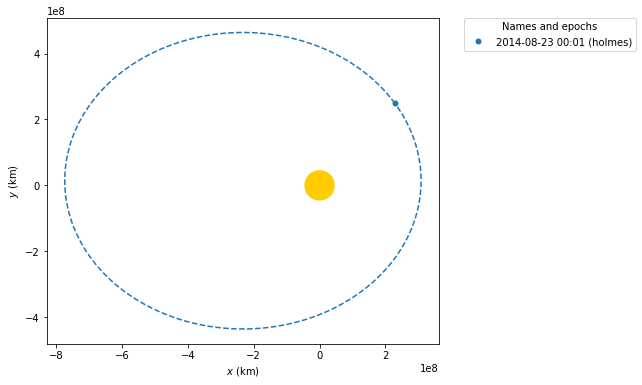

In [28]:
#sbdb is the 'small body database'
holmes = Orbit.from_sbdb("17P")
holmes.plot(label="holmes");
holmes.epoch.iso #this id the epoch given 
holmes.period/(3600*24*365.25)

Orbit

In [29]:
from astropy.coordinates import solar_system_ephemeris
solar_system_ephemeris.set("jpl")

KeyboardInterrupt: 

In [31]:
from poliastro.ephem import Ephem
from astropy import time

In [34]:
epoch = time.Time("2020-04-29 10:43")
earth = Ephem.from_body(Earth, epoch.tdb)
earth

Ephemerides at 1 epochs from 2020-04-29 10:44:09.186 (TDB) to 2020-04-29 10:44:09.186 (TDB)

In [77]:
earth_orbit = Orbit.from_ephem(Sun, earth, epoch)
earth_orbit_prop = earth_orbit.propagate(15.4022**4*u.min)

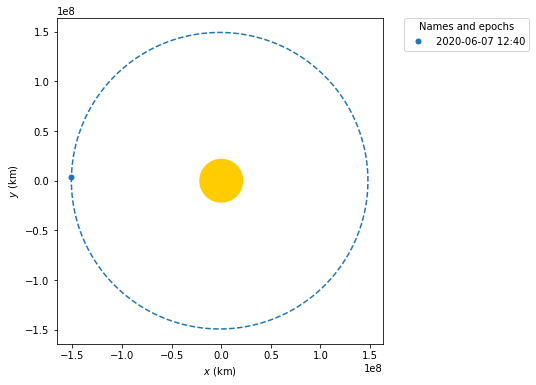

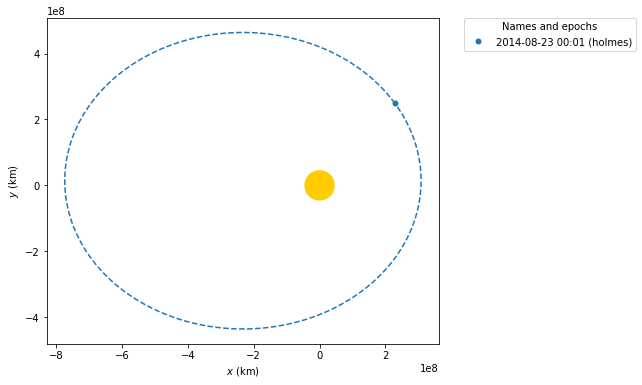

In [78]:
earth_orbit_prop.plot()
holmes.plot(label="holmes");